In [0]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image as im
import matplotlib . cm as cm

In [0]:
data = np.load('olivetti_faces.npy')

In [0]:
print(data.shape)

(400, 64, 64)


since images vary in size 64 in this case has to be changed if for other datasets

In [0]:
no_of_uface = 10
data = data[:10*no_of_uface]
# train_data = data[]
train_data = []
test_data = []
for i in range(no_of_uface*10):
  if(i % 10 < 6):
    train_data.append(data[i:i+1].reshape(64*64,1))
  else:
    test_data.append(data[i:i+1].reshape(64*64,1))


spliting data

In [0]:
train_data = np.array(train_data).reshape(int(no_of_uface*10*0.6), 64*64)
test_data = np.array(test_data).reshape(no_of_uface-int(no_of_uface*10*0.6), 64*64)
print(train_data.shape)

(60, 4096)


In [0]:
# plt.imshow(train_data[0:1].reshape(64 ,64),cmap='gray');
mean_face = np.mean(train_data, axis =0)

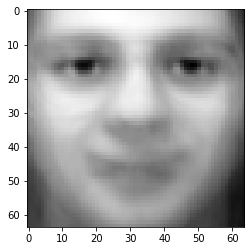

In [0]:
plt.imshow(mean_face.reshape(64 ,64),cmap='gray');

Applying pca

In [0]:
cov = np.zeros((int(no_of_uface*10*0.6), int(no_of_uface*10*0.6)))
cov = np.matmul((train_data-mean_face).T,(train_data-mean_face))

cov = cov/train_data.shape[1]
eig_val, eig_vec = np.linalg.eig(cov)


In [0]:
pcs = 50
pc_mat = eig_vec[:, range(pcs)]
face_char = np.matmul((train_data- mean_face),pc_mat)
print(pcs)

50


In [0]:
print(face_char.shape)
face_sig = np.matmul(face_char, pc_mat.T)

(60, 50)


Testing the sample, here I have taken a criteria for verifying, based on the observation on the data that samples of same person are consecutive

In [0]:
test_data_char = np.matmul((test_data-mean_face), pc_mat) 
i = 0
count = 0
for face in test_data_char:
  index =  np.argmin(np.linalg.norm(face - face_char, axis=1))
  if(int(index/6) == int(i/4)):
    count += 1
  i += 1

In [0]:
print("accuracy: ",count/i)
# plt.imshow(train_data[index].reshape(64 ,64),cmap='gray');

accuracy:  0.8
